# 분류분석: 결정 트리 분석을 이용한 사용자 움직임 분류 프로젝트

### 1) 데이터 수집

#### - https://archive.ics.uci.edu/에 접속하여, ‘human activity recognition’를 검색한다. 
 -‘UCI HAR Dataset’  압축파일을 다운받아서, 압축을 푼다. 

### ★ "Duplicate names are not allowed" 에러가 발생하지 않도록 pandas 버전을 down grade하여 설치 하기
#### 방법1) Anaconda Prompt를 관리자 권한으로 실행하여, pip install pandas==0.24.2  
##### >> [Anaconda Prompt] 메뉴에서 마우스 오른쪽 버튼을 클릭하고 [자세히]-[관리자 권한으로 실행]한 후에 명령어 입력
#### 방법2) 주피터 노트북을 관리자 권한으로 실행한 후에, !pip install pandas==0.24.2  
##### >> [Jupyter Notebook] 메뉴에서 마우스 오른쪽 버튼을 클릭하고 [자세히]-[관리자 권한으로 실행] 한 후에 명령어 입력

In [96]:
# numpy==1.16.2  (이 버전의 numpy를 설치해야 함)
!pip install pandas==0.24.2  

### 2) 데이터 준비 및 탐색

In [1]:
import numpy as np
import pandas as pd

pd.__version__ 

'0.24.2'

In [2]:
# 피처 이름 파일 읽어오기 
feature_name_df = pd.read_csv(r'C:\Users\shqkd\Desktop\textrank\features.txt', sep='\s+',  header=None, names=['index', 'feature_name'], engine='python')

In [3]:
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
feature_name_df.shape

(561, 2)

In [5]:
# index 제거하고, feature_name만 리스트로 저장
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [6]:
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [7]:
X_train = pd.read_csv(r'C:\Users\shqkd\Desktop\textrank\X_train.txt', sep='\s+', names=feature_name, engine='python')
X_test = pd.read_csv(r'C:\Users\shqkd\Desktop\textrank\X_test.txt', sep='\s+', names=feature_name, engine='python')

Y_train = pd.read_csv(r'C:\Users\shqkd\Desktop\textrank\Y_train.txt', sep='\s+', header=None, names=['action'], engine='python')
Y_test = pd.read_csv(r'C:\Users\shqkd\Desktop\textrank\Y_test.txt', sep='\s+', header=None, names=['action'], engine='python')

D:\anaconda\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [8]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [10]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [11]:
print(Y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [12]:
label_name_df = pd.read_csv(r'C:\Users\shqkd\Desktop\textrank\activity_labels.txt', sep='\s+',  header=None, names=['index', 'label'], engine='python')

In [13]:
# index 제거하고, feature_name만 리스트로 저장
label_name = label_name_df.iloc[:, 1].values.tolist()

label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

### 3) 모델 구축 : 결정트리모델

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
# 결정 트리 분류 분석 : 1) 모델 생성
dt_HAR = DecisionTreeClassifier(random_state=156)

In [16]:
# 결정 트리 분류 분석 : 2) 모델 훈련
dt_HAR.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

In [17]:
# 결정 트리 분류 분석 : 3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = dt_HAR.predict(X_test)

### 4) 결과 분석

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(Y_test, Y_predict)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8548


#### ** 성능 개선을 위해 최적 파라미터 값 찾기

In [20]:
print('결정 트리의 현재 하이퍼 파라미터 : \n', dt_HAR.get_params())

결정 트리의 현재 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [21]:
from sklearn.model_selection import GridSearchCV

#### 최적 파라미터 찾기 - 1

In [22]:
params = {
    'max_depth' : [ 6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [23]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850791,0.944879
1,8,0.851069,0.982692
2,10,0.851209,0.993403
3,12,0.844135,0.997212
4,16,0.851344,0.999660
5,20,0.850800,0.999966
6,24,0.849440,1.000000


In [24]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8513, 최적 하이퍼 파라미터 :{'max_depth': 16}


#### 최적 파라미터 찾기 - 2

In [25]:
params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [26]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.852023,0.981468
1,8,16,0.854879,0.979836
2,8,24,0.851342,0.978237
3,16,8,0.844136,0.994457
4,16,16,0.847127,0.990479
5,16,24,0.849439,0.986772
6,20,8,0.846040,0.994491
7,20,16,0.848624,0.990479
8,20,24,0.849167,0.986772


In [27]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8549, 최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_split': 16}


In [28]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도 : {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도 : 0.8717


#### **  중요 피처 확인하기

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X_train.columns)

In [31]:
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]

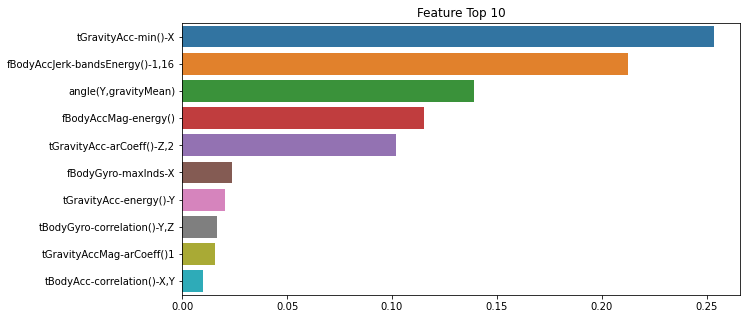

In [32]:
plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x=feature_top10, y=feature_top10.index)
plt.show()

## 5) Graphviz를 사용한 결정트리 시각화

### (1) https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/에서 "graphviz-install-2.44.1-win64.exe"를 다운로드 받아서 설치
### (2) 설치한 경로를 시스템 변수 path에 직접 추가하기
#### Program Files 폴더에 있는 graphviz 폴더 잘라내기 
#### ->  잘라낸 graphviz 폴더를 C:\Users\anaconda3\Lib\site-packages에 붙여넣기
#### ->  [제어판]-[시스템]-[고급 시스템 설정]-[환경변수]-[시스템변수]에서 Path를 선택하고 [편집]에서 C:\Users\anaconda3\Lib\site-packages\graphviz 추가하기

### (3) 파이썬 래퍼 모듈 graphviz를 pip 명령으로 Anaconda에 설치

In [38]:
!pip install graphviz

In [39]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성. 
export_graphviz(best_dt_HAR, out_file="tree.dot", class_names=label_name , feature_names = feature_name, impurity=True, filled=True, rotate=True)

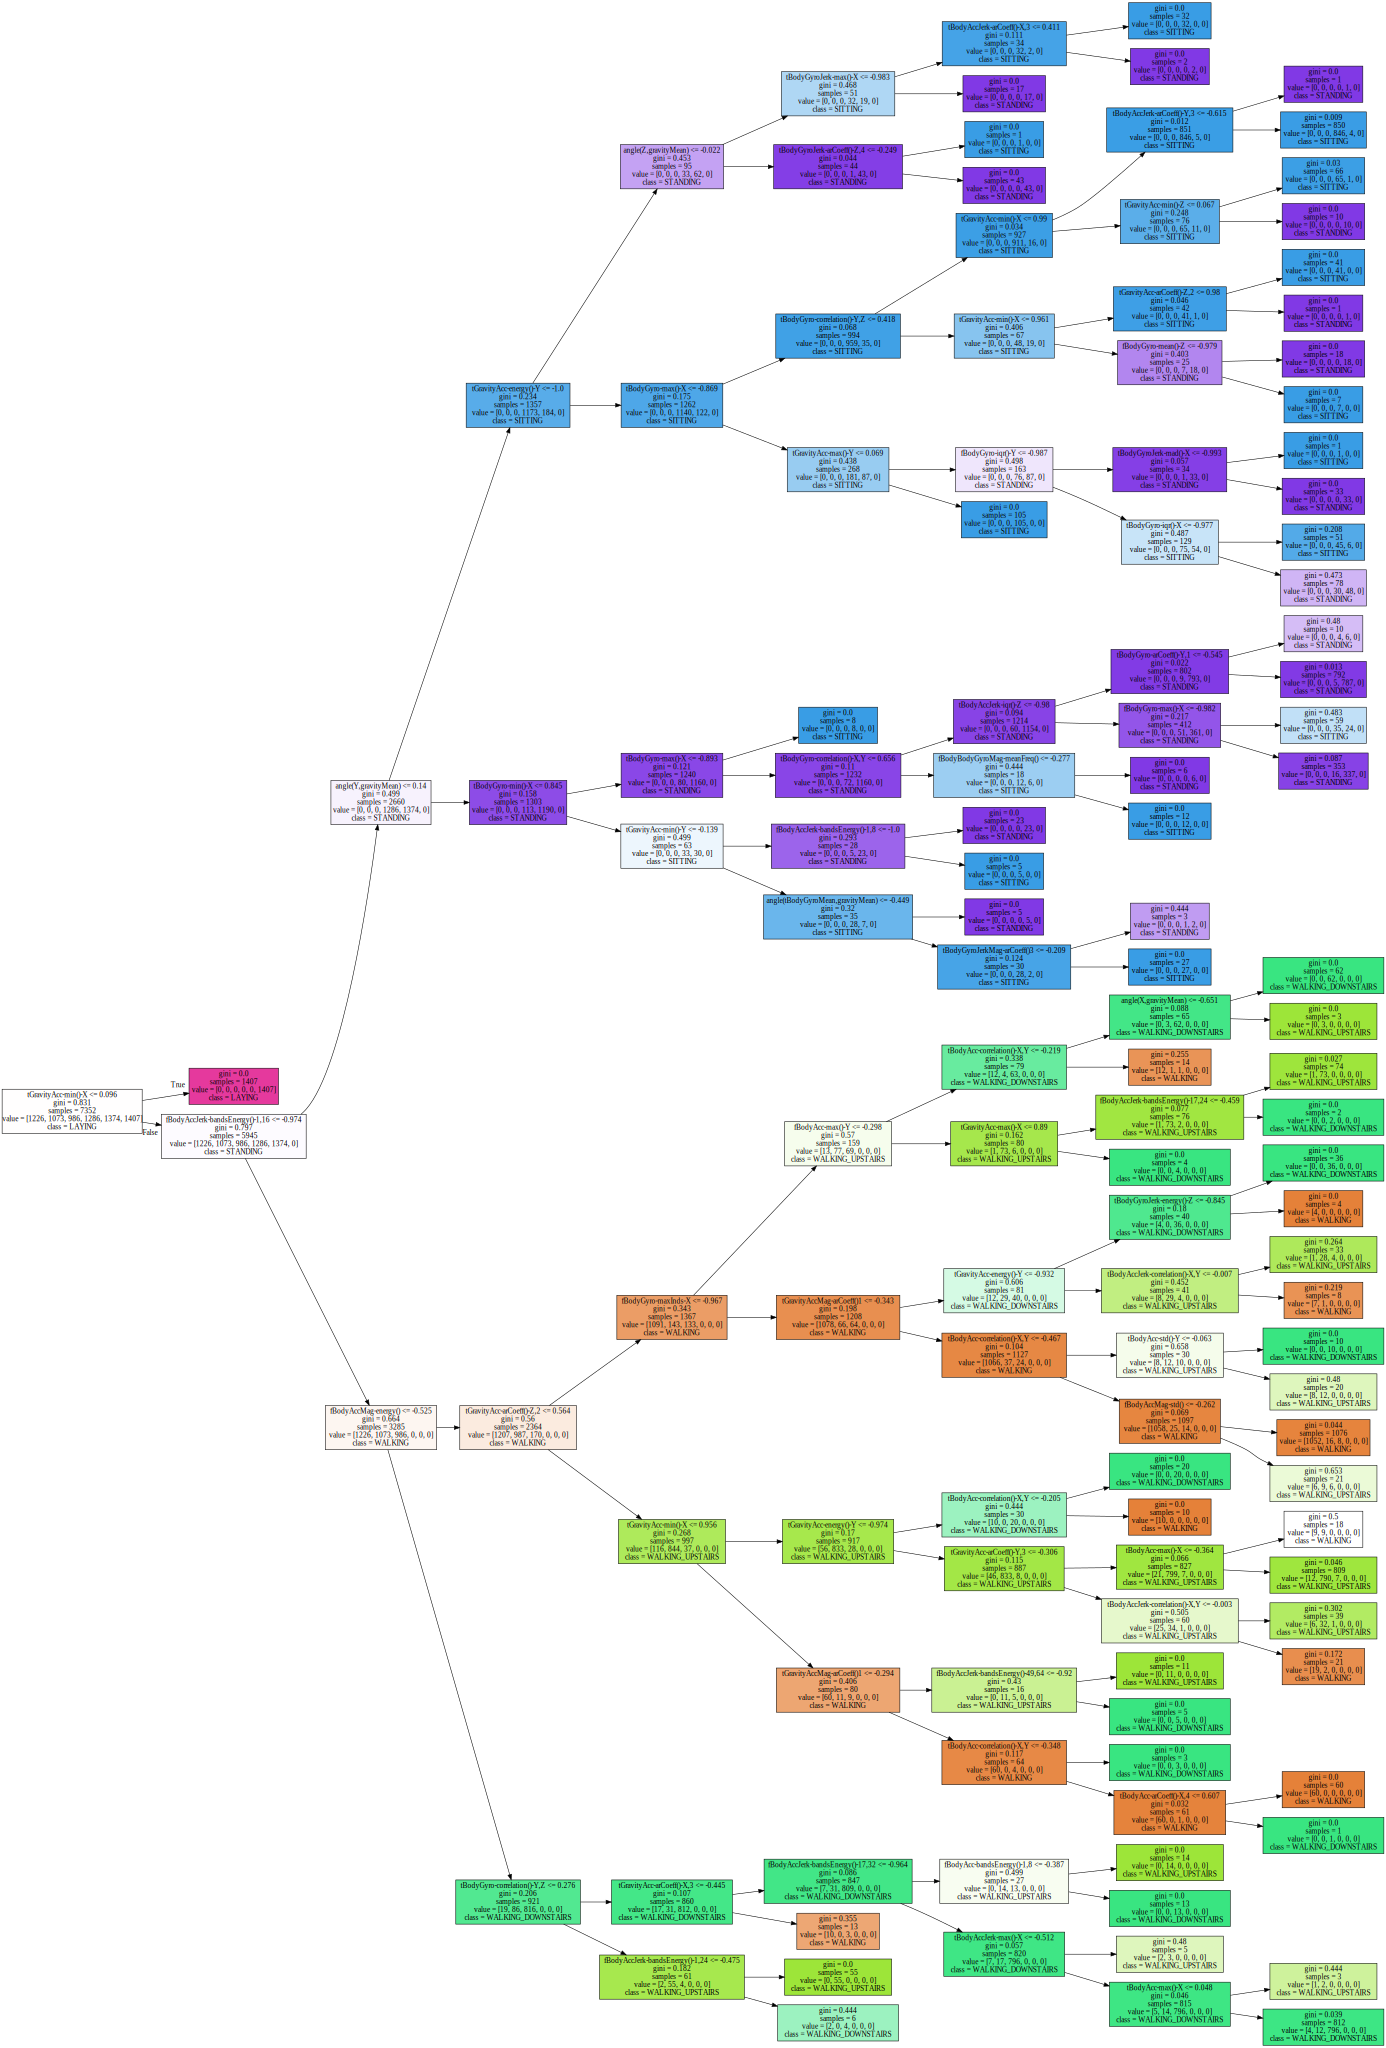

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
        
display(graphviz.Source(dot_graph))

In [5]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
        
graphviz.Source(dot_graph,format='png').view()

'Source.gv.png'

# 분류분석: 와인데이터

In [6]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [7]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
alcohol    6497 non-null float64
sugar      6497 non-null float64
pH         6497 non-null float64
class      6497 non-null float64
dtypes: float64(4)
memory usage: 203.1 KB


In [9]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [10]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [12]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [15]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 결정 트리

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


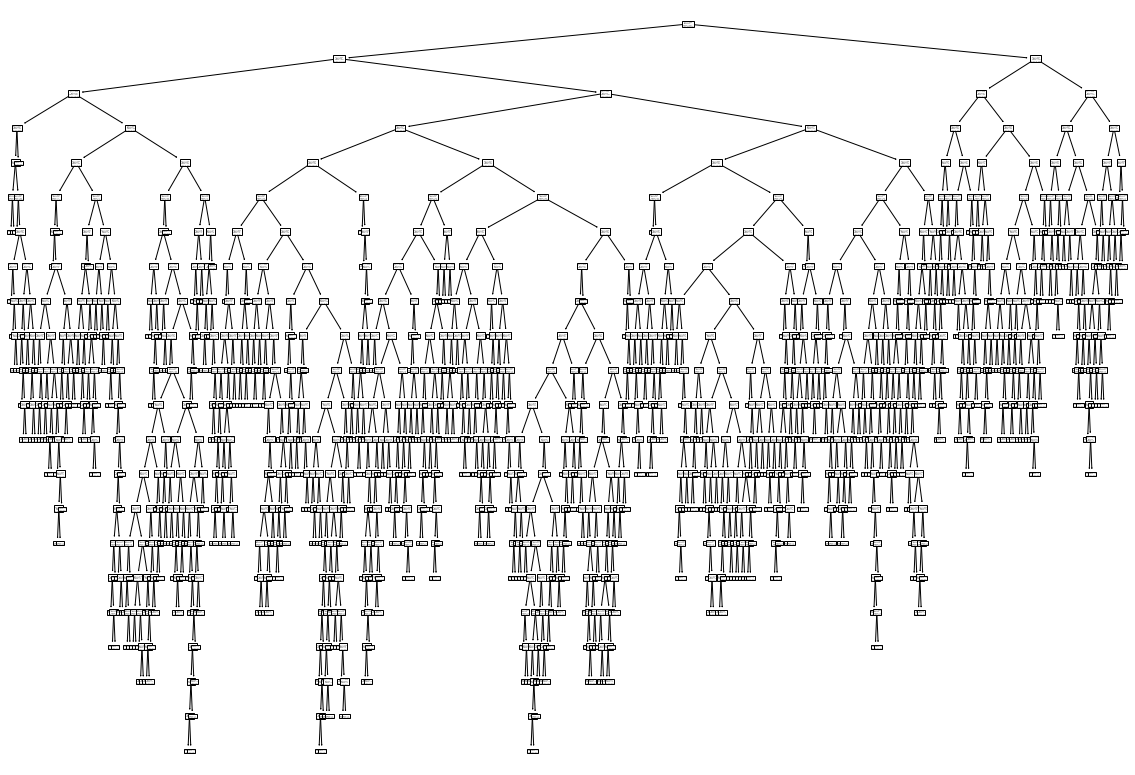

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(2*10,2*7))
plot_tree(dt)
plt.show()

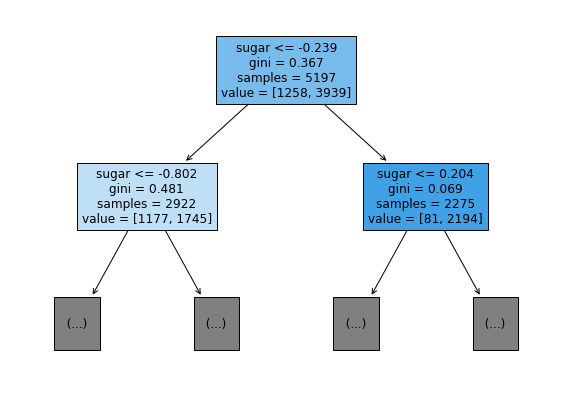

In [18]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 가지치기

In [19]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


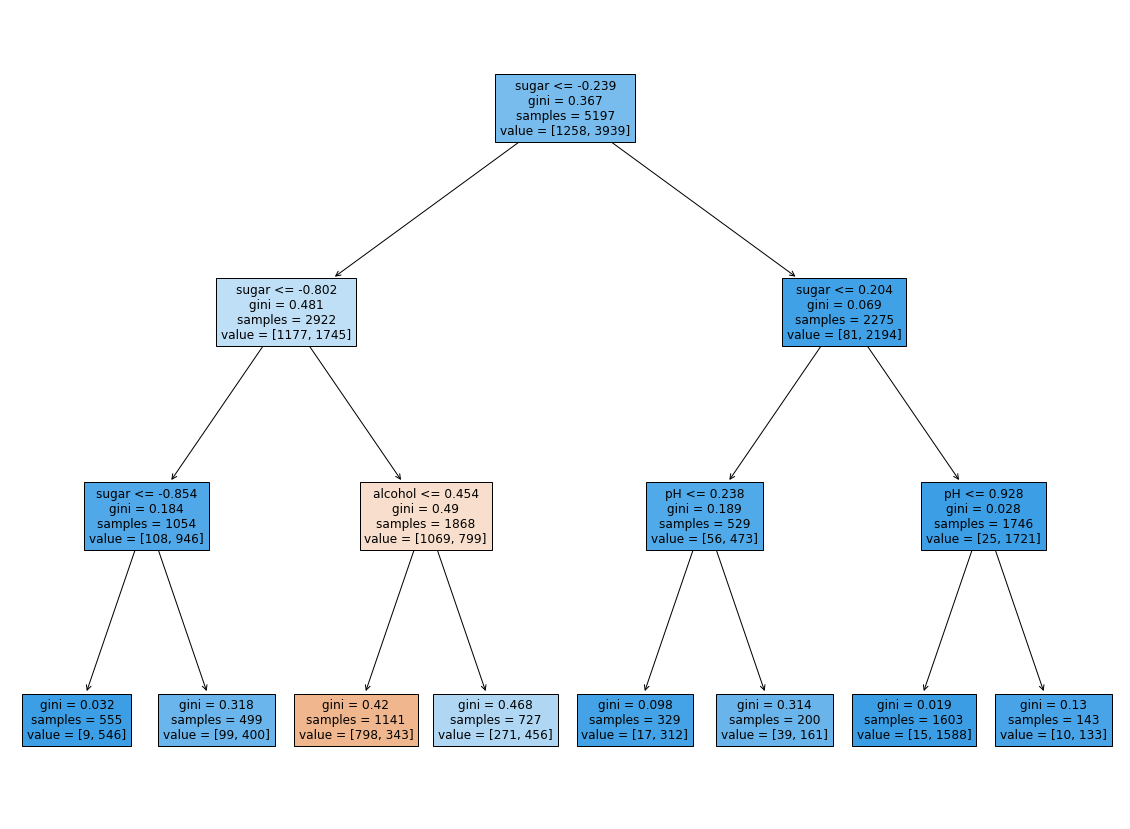

In [20]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [21]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


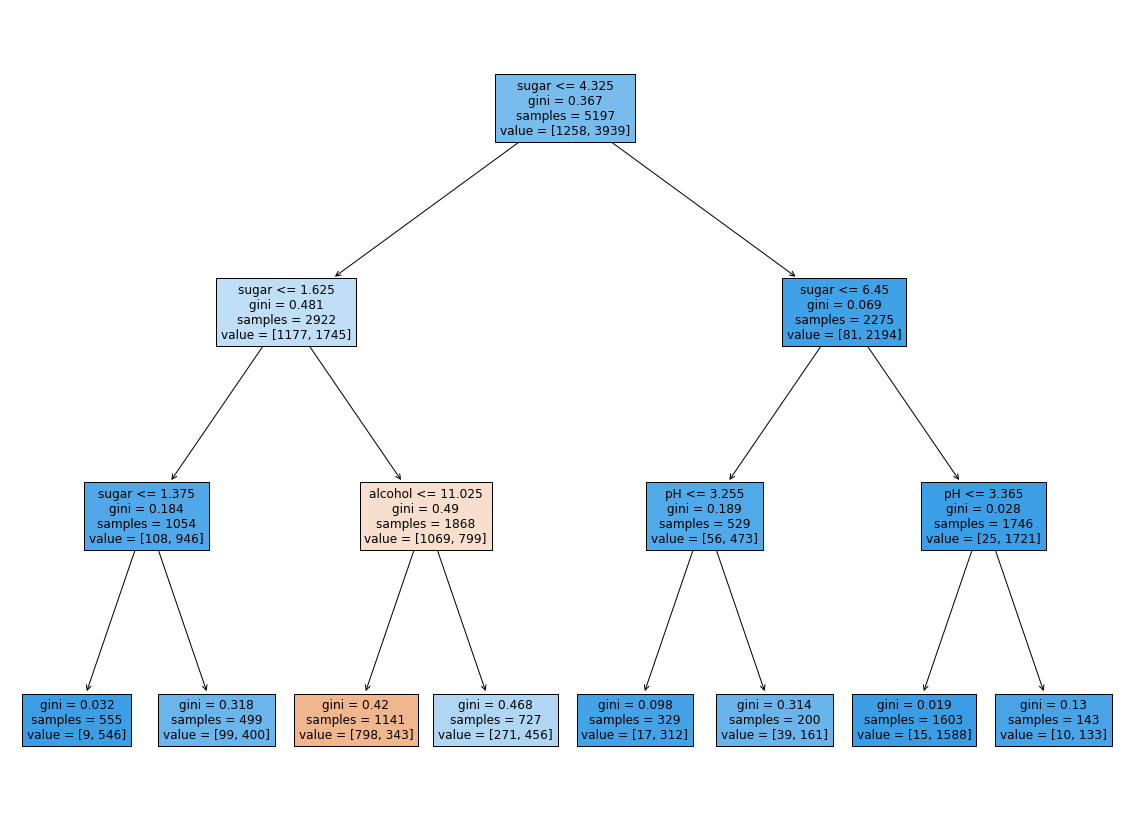

In [22]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [23]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [24]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


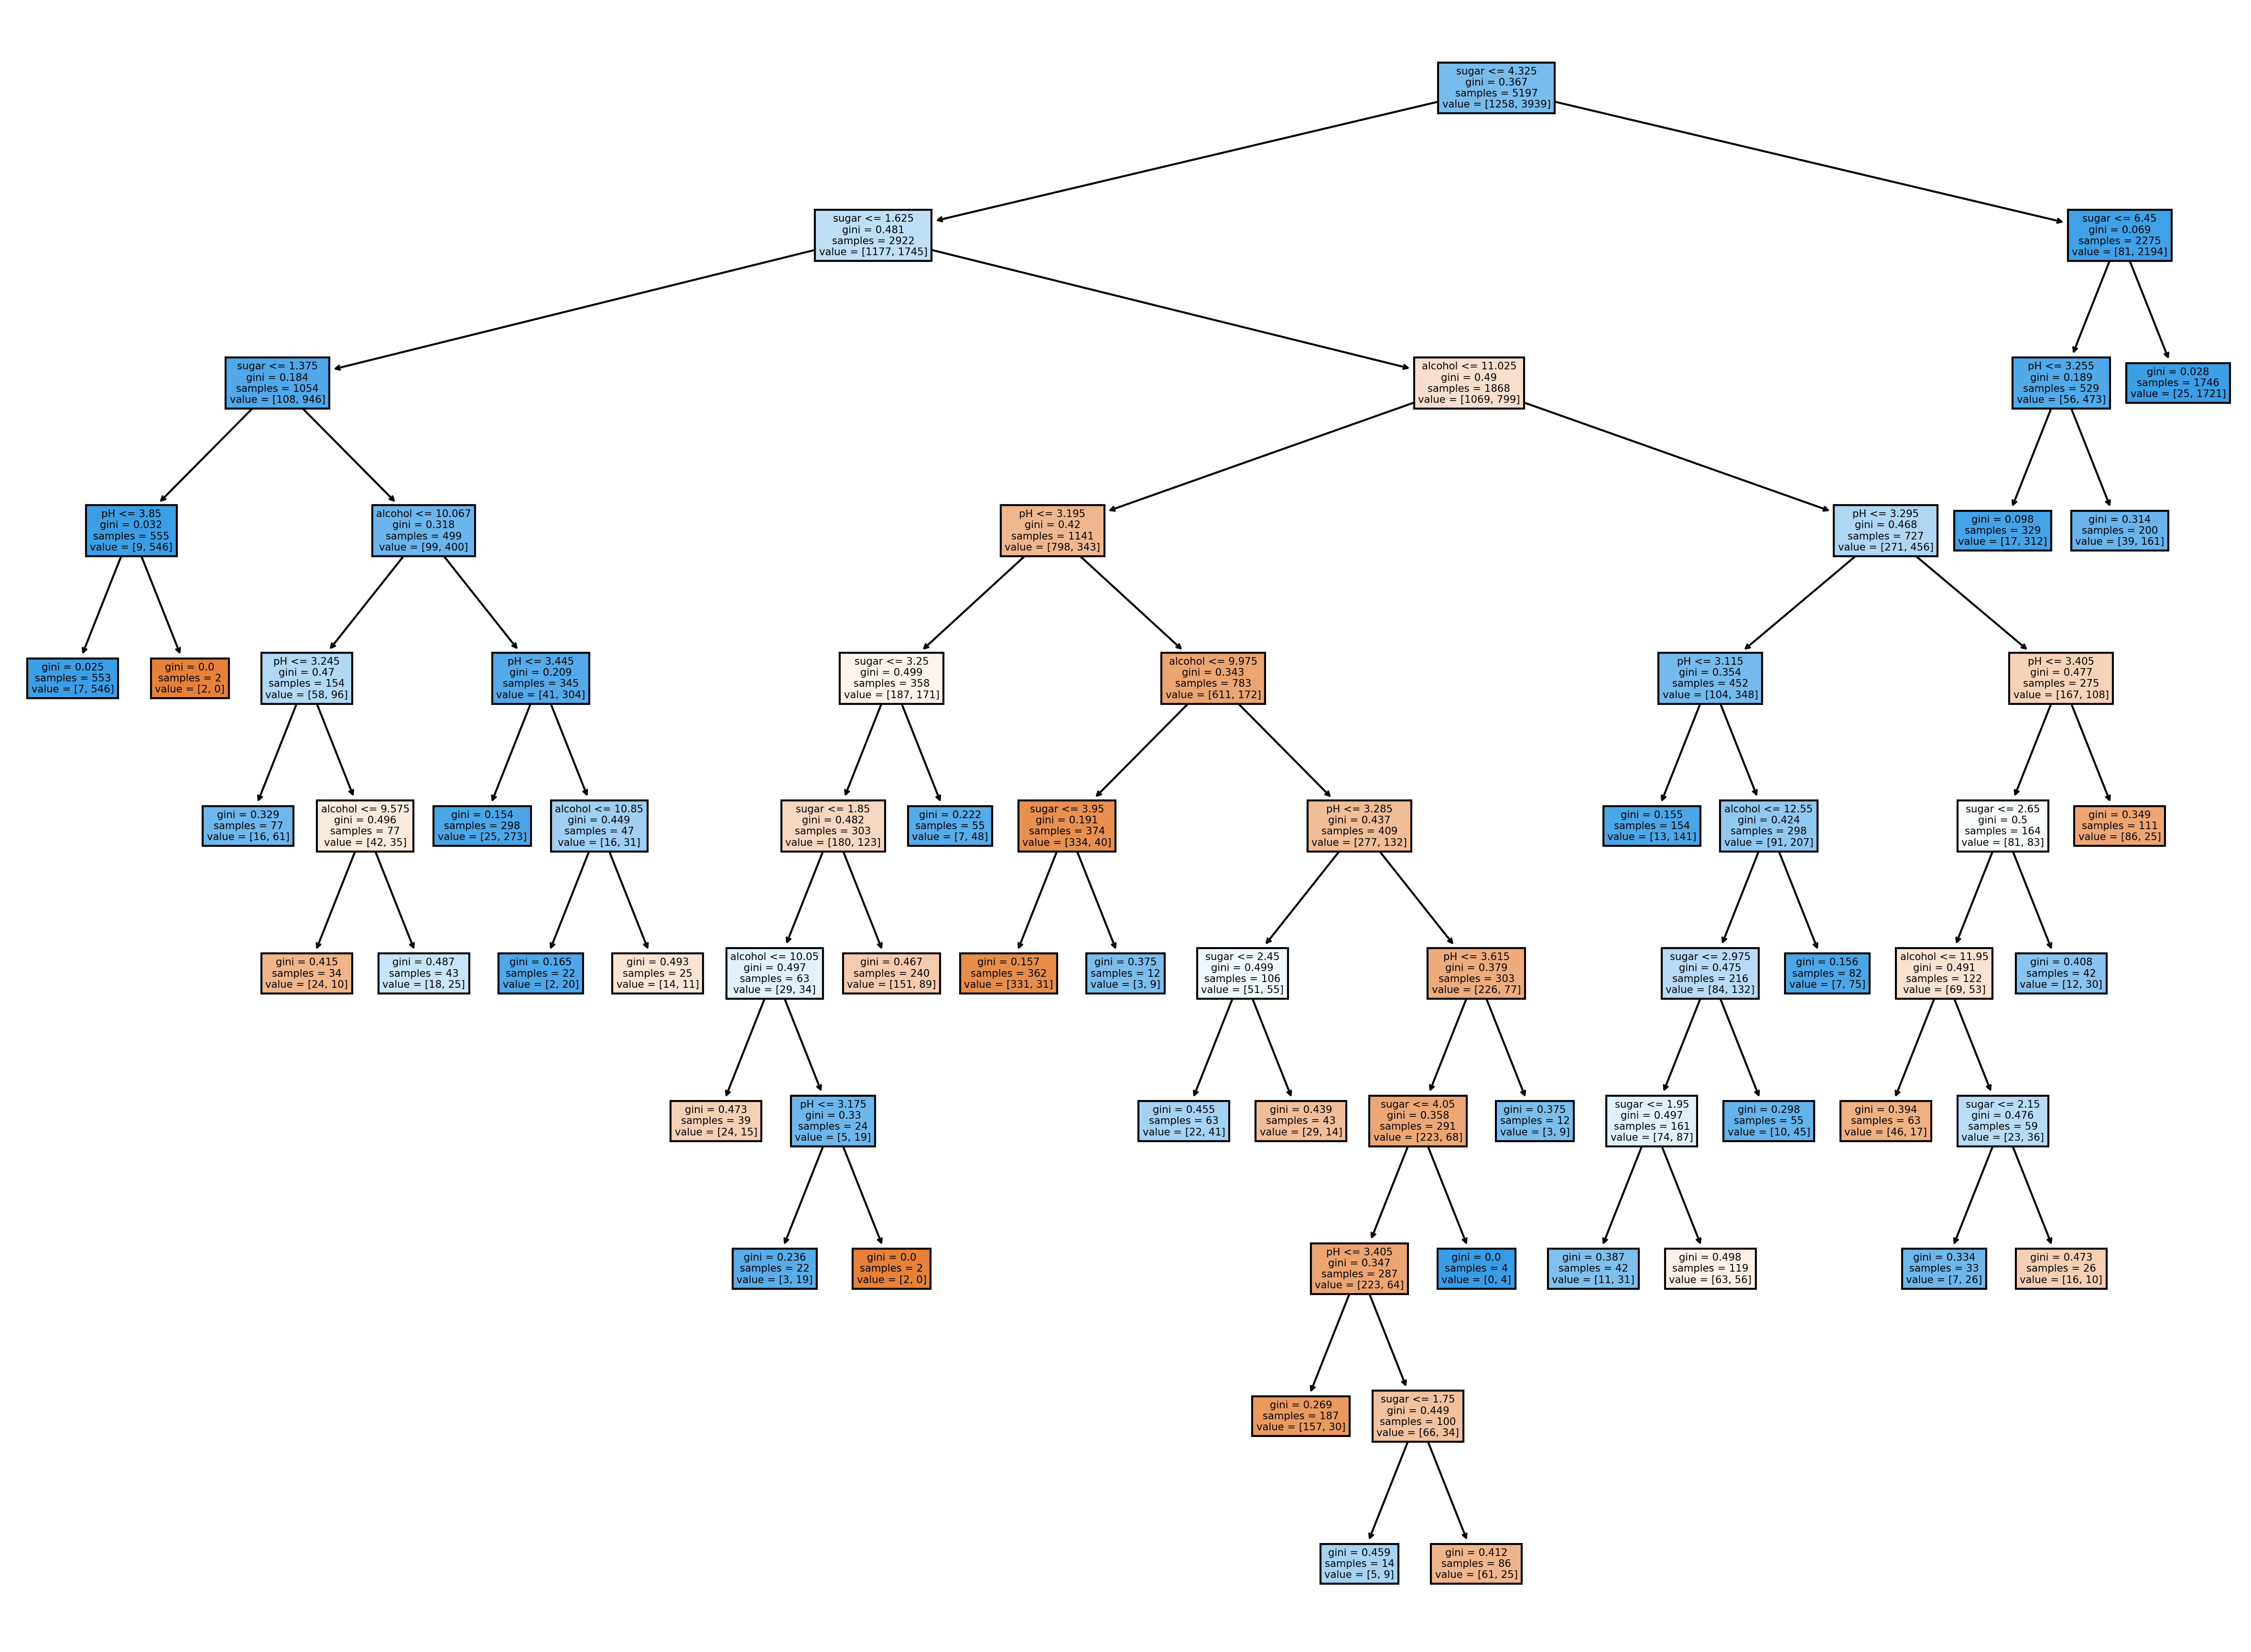

In [25]:
plt.figure(figsize=(20,15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# Predicting Bike Rentals with Decision Trees

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

bike_rentals = pd.read_csv(r"C:\Users\shqkd\Desktop\textrank\bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

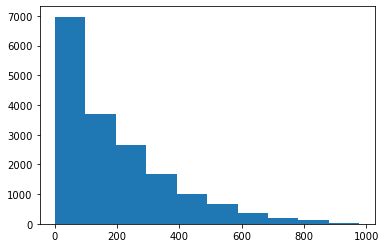

In [27]:
plt.hist(bike_rentals['cnt'])

In [28]:
bike_rentals['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [29]:
def assign_label(hour):
    if hour > 6 and hour <= 12:
        return 1
    elif hour > 12 and hour <= 18:
        return 2
    elif hour > 18 and hour <= 24:
        return 3
    else:
        return 4

In [30]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [31]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379,0.006533
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056,0.006467
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495,0.004770
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638,0.005782
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071,-0.305052
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927,-0.000586
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900,0.002636
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284,-0.000640
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426,-0.031821
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,-0.112537


In [32]:
correlations = bike_rentals.corr()
correlations['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.494422
Name: cnt, dtype: float64

In [33]:
columns = bike_rentals.columns.drop(['cnt', 'casual', 'dteday', 'registered'])
columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'time_label'],
      dtype='object')

In [34]:
import math

#Sample 80% of the data randomly and assigns it to train.
eighty_percent_values = math.floor(bike_rentals.shape[0]*0.8)
train = bike_rentals.sample(n=eighty_percent_values, random_state = 1)

#Selects the remaining 20% to test.
test = bike_rentals.drop(train.index)

In [35]:
train.shape[0] + test.shape[0] == bike_rentals.shape[0]

True

In [36]:
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])
predictions_test = lr.predict(test[columns])
mse_test = mean_squared_error(test['cnt'], predictions_test)
mse_test

15848.50019509927

In [37]:
predictions_train = lr.predict(train[columns])
mse_train = mean_squared_error(train['cnt'], predictions_train)
mse_train

16262.308571201116

In [38]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])

mse = mean_squared_error(test['cnt'], predictions)
mse

2736.9558873092105

In [39]:
mse_leaf=[]
for i in range(1, 10):
    tree = RandomForestRegressor(min_samples_leaf=i, n_estimators=250)
    tree.fit(train[columns], train['cnt'])
    predictions = tree.predict(test[columns])

    mse = mean_squared_error(test['cnt'], predictions)
    mse_leaf.append(mse)
mse_leaf

[1849.4538203590334,
 1849.6081981975312,
 1913.3719123831286,
 1979.0271322756068,
 2030.3407756222682,
 2071.716307430979,
 2132.4187900818465,
 2214.655213989398,
 2261.085381535924]

In [40]:
n_trees = [250, 500, 750]
mse_trees=[]
for i in n_trees:
    tree = RandomForestRegressor(min_samples_leaf=1, n_estimators=i)
    tree.fit(train[columns], train['cnt'])
    predictions = tree.predict(test[columns])

    mse = mean_squared_error(test['cnt'], predictions)
    mse_trees.append(mse)
mse_trees

[1835.4420484510931, 1823.9237771196777, 1825.4510717632018]

# Breast Cancer Prediction using Decision Trees Algorithm

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
breast_cancer = pd.read_csv(r'C:\Users\shqkd\Desktop\textrank\breast-cancer.csv')

In [42]:
print(breast_cancer.head())

         id diagnosis  radius (nucA)  texture (nucA)  perimeter (nucA)  \
0    842302         M          17.99           10.38            122.80   
1    842517         M          20.57           17.77            132.90   
2  84300903         M          19.69           21.25            130.00   
3  84348301         M          11.42           20.38             77.58   
4  84358402         M          20.29           14.34            135.10   

   area (nucA)  smoothness (nucA)  compactness (nucA)  concavity (nucA)  \
0       1001.0            0.11840             0.27760            0.3001   
1       1326.0            0.08474             0.07864            0.0869   
2       1203.0            0.10960             0.15990            0.1974   
3        386.1            0.14250             0.28390            0.2414   
4       1297.0            0.10030             0.13280            0.1980   

   concave points (nucA)  ...  radius (nucC)  texture (nucC)  \
0                0.14710  ...          2

In [43]:
del breast_cancer['id']
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.loc[:, breast_cancer.columns != 'diagnosis'],
                                                    breast_cancer['diagnosis'], stratify=breast_cancer['diagnosis'], random_state=66)

In [44]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')} ") 

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9510 


In [45]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
 
print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9859 
Decision tree testing set accuracy: 0.9371 


In [46]:
print(f"Breast Cancer Feature Importances: \n {format(tree.feature_importances_)} ")

Breast Cancer Feature Importances: 
 [0.         0.         0.         0.02285783 0.         0.
 0.         0.02420232 0.         0.         0.         0.
 0.01635447 0.         0.         0.         0.         0.
 0.         0.         0.00908582 0.05099836 0.7643834  0.0057787
 0.         0.01007777 0.         0.09626133 0.         0.        ] 


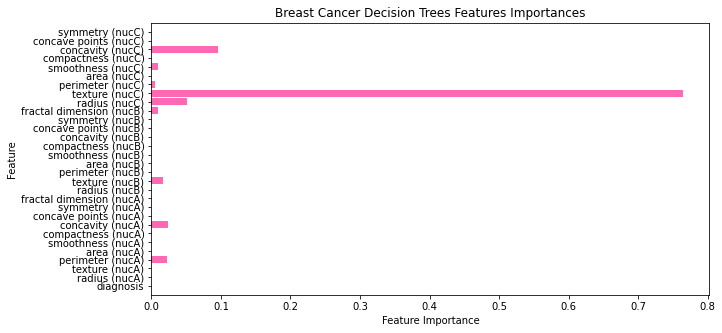

In [47]:
breast_cancer_features = [x for i,x in enumerate(breast_cancer.columns) if i!=30]
 
def breast_cancer_feature_importances_plot(model):
    plt.figure(figsize=(10,5))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color=['#FF69B4'])
    plt.yticks(np.arange(n_features), breast_cancer_features)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
breast_cancer_feature_importances_plot(tree)
plt.show()

# An introduction to explainable AI with Shapley values: Boston Housing

In [49]:
# http://wolfr.am/VOXE6jxa
import pandas as pd
import shap
import sklearn

# a classic housing price dataset
X,y = shap.datasets.boston()
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [50]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


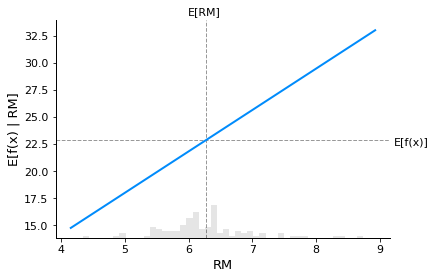

In [51]:
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

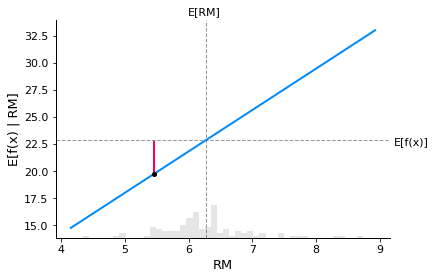

In [52]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

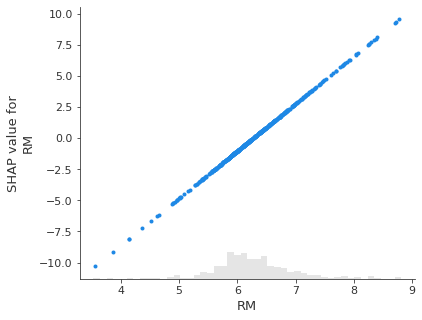

In [53]:
shap.plots.scatter(shap_values[:,"RM"])

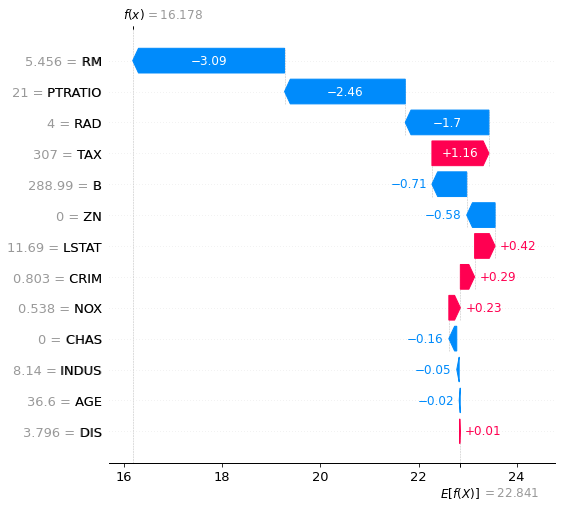

In [54]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

Permutation explainer: 507it [00:28, 11.46it/s]                                                                        


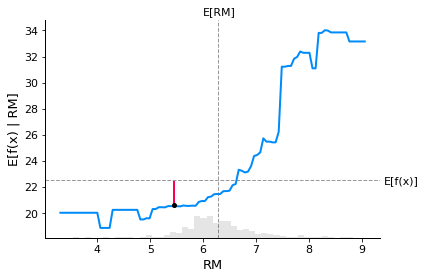

In [58]:
# fit a GAM model to the data
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "RM", model_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

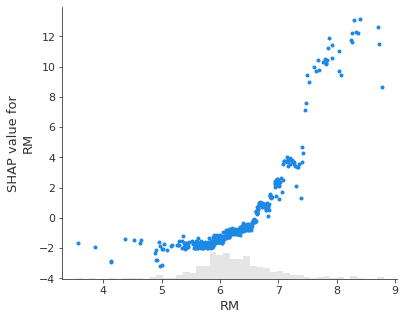

In [59]:
shap.plots.scatter(shap_values_ebm[:,"RM"])

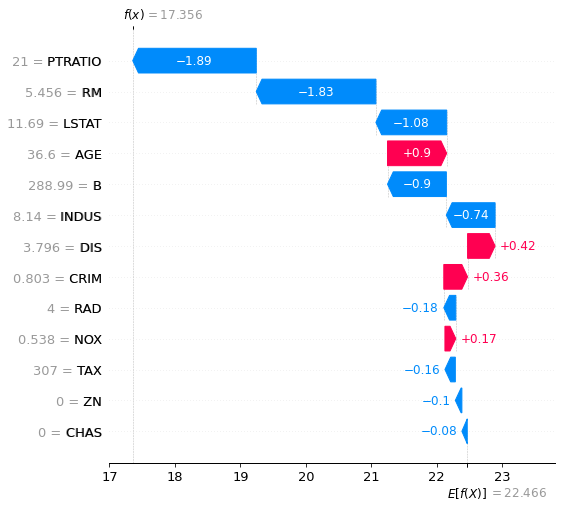

In [60]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=14)

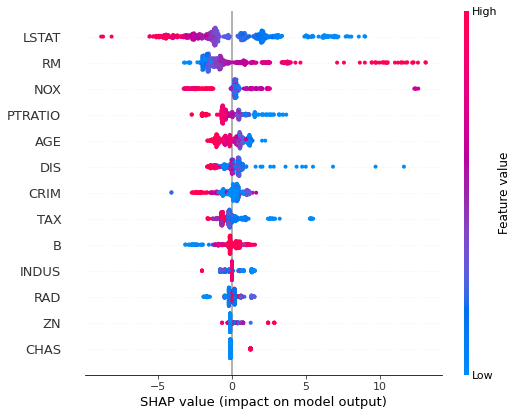

In [61]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm, max_display=14)

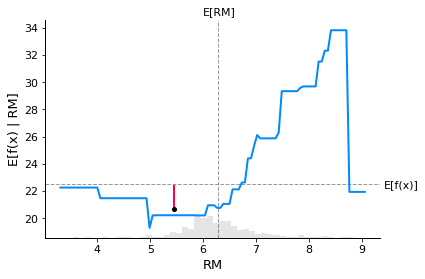

In [64]:
# train XGBoost model
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "RM", model_xgb.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

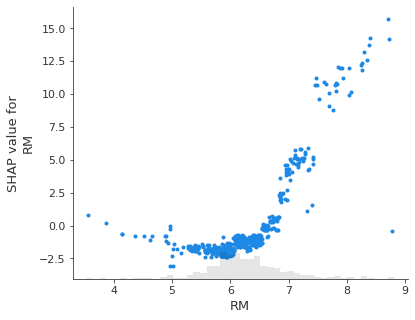

In [65]:
shap.plots.scatter(shap_values_xgb[:,"RM"])

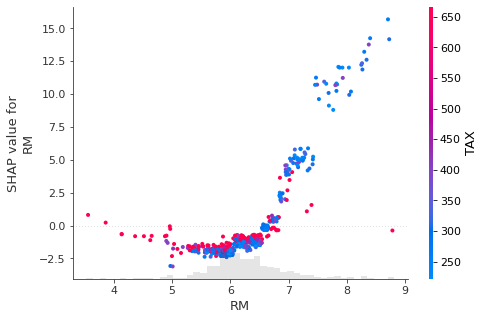

In [66]:
shap.plots.scatter(shap_values_xgb[:,"RM"], color=shap_values)

In [67]:
# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)

def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

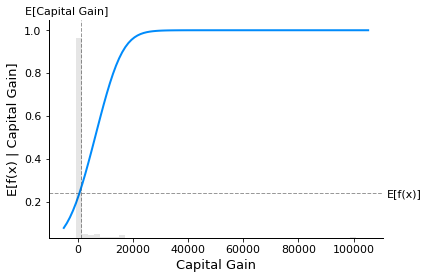

In [68]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "Capital Gain", model_adult_proba, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [69]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_adult, max_samples=100)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X_adult[:1000])

Permutation explainer: 1001it [00:12, 19.08it/s]                                                                       


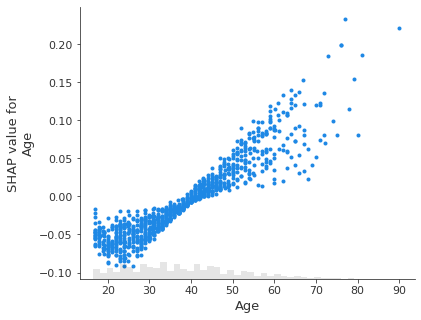

In [70]:
shap.plots.scatter(shap_values_adult[:,"Age"])

In [71]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_adult_log_odds, background_adult)
shap_values_adult_log_odds = explainer_log_odds(X_adult[:1000])

Permutation explainer: 1001it [00:12, 14.56it/s]                                                                       


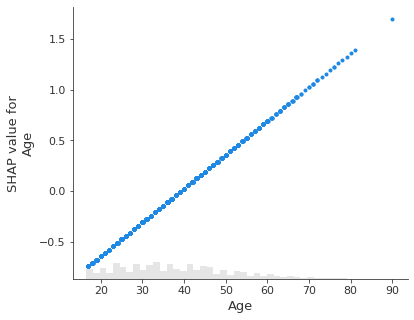

In [72]:
shap.plots.scatter(shap_values_adult_log_odds[:,"Age"])

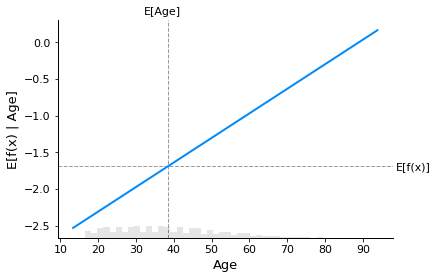

In [73]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "Age", model_adult_log_odds, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [74]:
# train XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_adult, y_adult)

# compute SHAP values
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X_adult)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[04:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 99%|===================| 32335/32561 [00:20<00:00]        

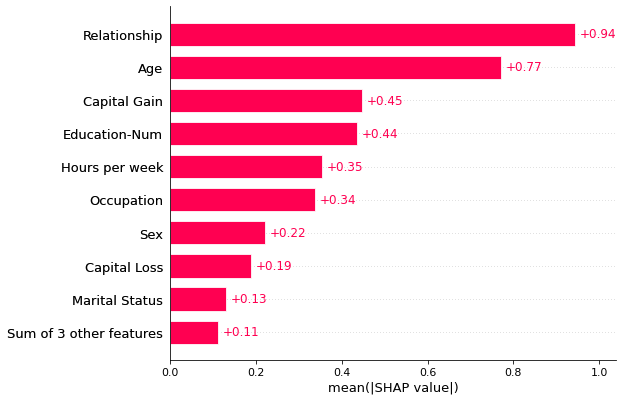

In [75]:
shap.plots.bar(shap_values)

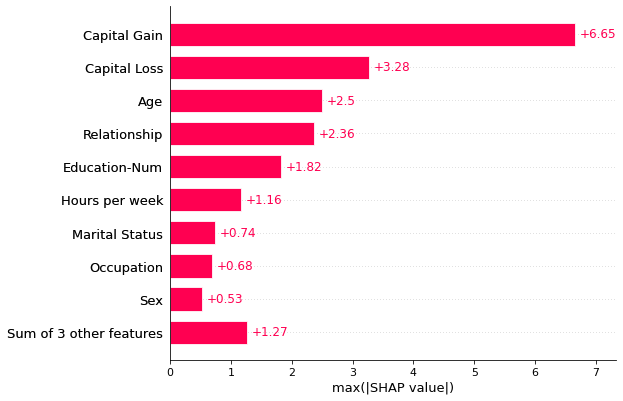

In [76]:
shap.plots.bar(shap_values.abs.max(0))

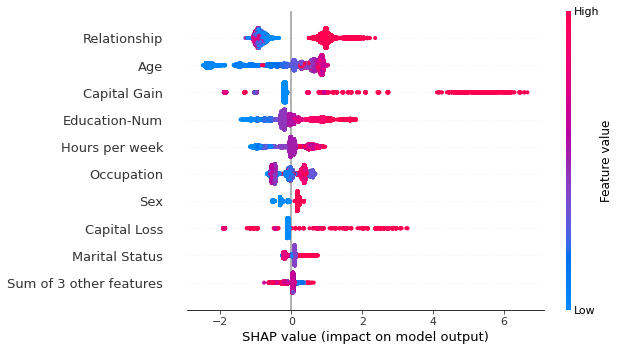

In [77]:
shap.plots.beeswarm(shap_values)

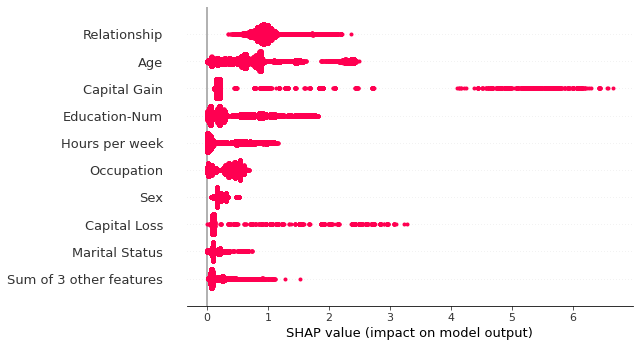

In [78]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

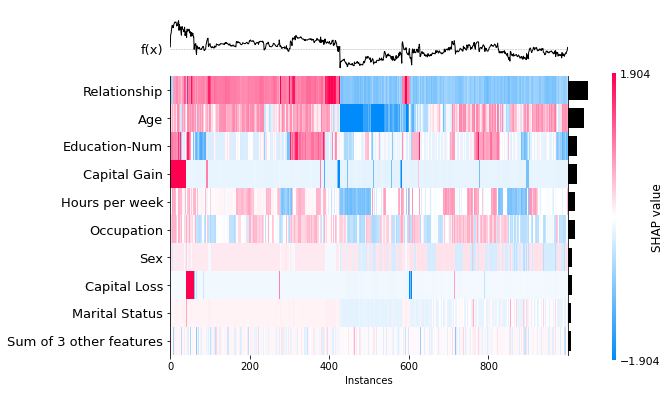

In [79]:
shap.plots.heatmap(shap_values[:1000])

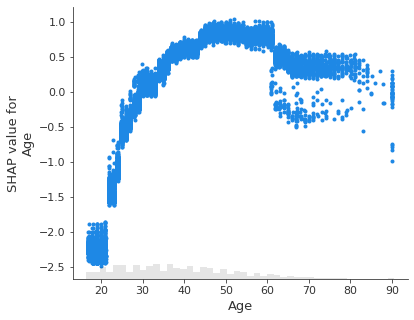

In [80]:
shap.plots.scatter(shap_values[:,"Age"])

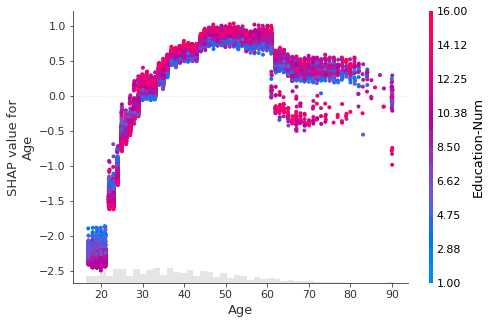

In [81]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values)

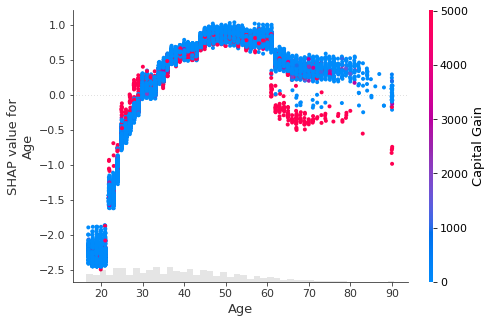

In [82]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,"Capital Gain"])

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


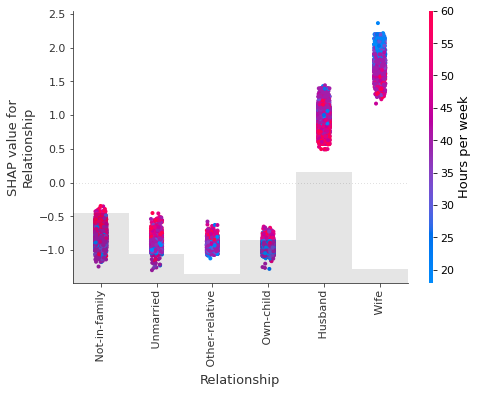

In [83]:
shap.plots.scatter(shap_values[:,"Relationship"], color=shap_values)

In [84]:
clustering = shap.utils.hclust(X_adult, y_adult)

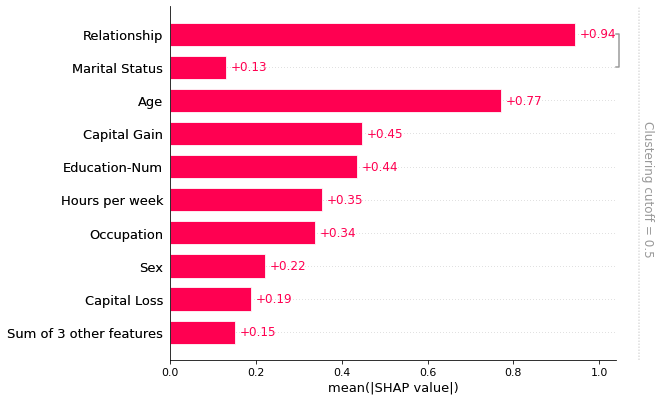

In [85]:
shap.plots.bar(shap_values, clustering=clustering)

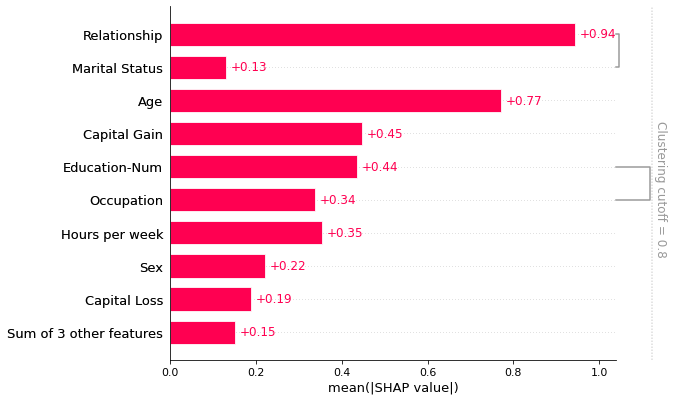

In [86]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

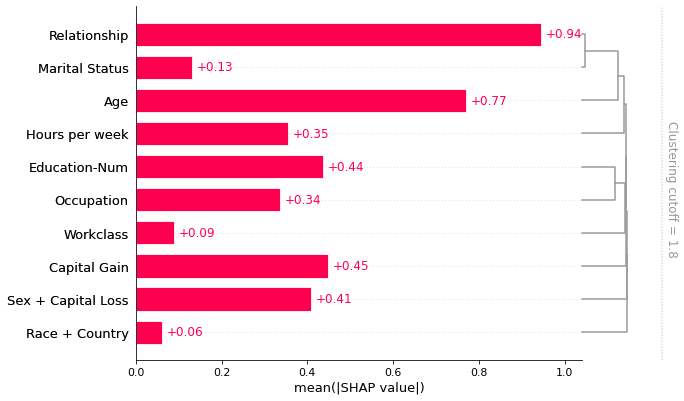

In [87]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)

In [94]:
!pip install numpy==1.17

  Using cached numpy-1.17.0.zip (6.5 MB)
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
    Running setup.py install for numpy: started
    Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to d:\anaconda\lib\site-packages\numpy-1.20.3.dist-info\
   from D:\anaconda\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to d:\anaconda\lib\site-packages\numpy\
   from D:\anaconda\Lib\site-packages\~-mpy
  Moving to d:\anaconda\scripts\f2py.exe
   from C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-uninstall-8r90jmir\f2py.exe


  ERROR: Command errored out with exit status 1:
   command: 'D:\anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-2vjms318\\numpy_88052fc8bb294a73b532fbab92a3e8a4\\setup.py'"'"'; __file__='"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-2vjms318\\numpy_88052fc8bb294a73b532fbab92a3e8a4\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-wheel-ajswnirv'
       cwd: C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-install-2vjms318\numpy_88052fc8bb294a73b532fbab92a3e8a4\
  Complete output (2031 lines):
  Running from numpy source directory.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler

  success!
  removing: _configtest.c _configtest.obj _configtest.obj.d _configtest.exe
  C:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -Inumpy\core\src\common -Inumpy\core\src -Inumpy\core -Inumpy\core\src\npymath -Inumpy\core\src\multiarray -Inumpy\core\src\umath -Inumpy\core\src\npysort -ID:\anaconda\include -ID:\anaconda\include -IC:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\include -IC:\Program Files (x86)\Windows Kits\NETFXSDK\4.6.1\include\um -IC:\Program Files (x86)\Windows Kits\10\include\10.0.17763.0\ucrt -IC:\Program Files (x86)\Windows Kits\10\include\10.0.17763.0\shared -IC:\Program Files (x86)\Windows Kits\10\include\10.0.17763.0\um -IC:\Program Files (x86)\Windows Kits\10\include\10.0.17763.0\winrt -IC:\Program Files (x86)\Windows Kits\10\include\10.0.17763.0\cppwinrt /Tc_configtest.c /Fo_configtest.obj
  C:\Program Files (x86)\

In [95]:
import transformers
import shap
import nlp
import torch
import numpy as np
import scipy as sp

# load a BERT sentiment analysis model
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).cuda()

# define a prediction function`
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

# build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
imdb_train = nlp.load_dataset("imdb")["train"]
shap_values = explainer(imdb_train[:10], fixed_context=1)

  C:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\link.exe /nologo /INCREMENTAL:NO /LTCG /MANIFEST:EMBED,ID=1 /LIBPATH:C:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\lib\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\NETFXSDK\4.6.1\lib\um\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.17763.0\ucrt\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.17763.0\um\x64 _configtest.obj /OUT:_configtest.exe
  _configtest.obj : error LNK2001: tanl 외부 기호를 확인할 수 없습니다.
  _configtest.exe : fatal error LNK1120: 1개의 확인할 수 없는 외부 참조입니다.
  failure.
  removing: _configtest.c _configtest.obj _configtest.obj.d
  C:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -Inumpy\core\src\common -Inumpy\core\src -Inumpy\core -Inumpy\core\src\npymath -Inumpy\core\src\multiarray -Inumpy\core\src\umath

ModuleNotFoundError: No module named 'transformers'

  executing numpy\core\code_generators\generate_numpy_api.py
    adding 'build\src.win-amd64-3.8\numpy\core\include/numpy\__multiarray_api.h' to sources.
  executing numpy\core\code_generators\generate_ufunc_api.py
    adding 'build\src.win-amd64-3.8\numpy\core\include/numpy\__ufunc_api.h' to sources.
  conv_template:> build\src.win-amd64-3.8\numpy\core\src\multiarray\arraytypes.c
  conv_template:> build\src.win-amd64-3.8\numpy\core\src\multiarray\einsum.c
  conv_template:> build\src.win-amd64-3.8\numpy\core\src\multiarray\lowlevel_strided_loops.c
  conv_template:> build\src.win-amd64-3.8\numpy\core\src\multiarray\nditer_templ.c
  conv_template:> build\src.win-amd64-3.8\numpy\core\src\multiarray\scalartypes.c
  creating build\src.win-amd64-3.8\numpy\core\src\umath
  conv_template:> build\src.win-amd64-3.8\numpy\core\src\umath\funcs.inc
    adding 'build\src.win-amd64-3.8\numpy\core\src\umath' to include_dirs.
  conv_template:> build\src.win-amd64-3.8\numpy\core\src\umath\simd.inc
  con

  C:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\link.exe /nologo /INCREMENTAL:NO /LTCG /DLL /MANIFEST:EMBED,ID=2 /MANIFESTUAC:NO /LIBPATH:D:\anaconda\libs /LIBPATH:D:\anaconda\PCbuild\amd64 /LIBPATH:build\temp.win-amd64-3.8 /LIBPATH:C:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\lib\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\NETFXSDK\4.6.1\lib\um\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.17763.0\ucrt\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.17763.0\um\x64 npymath.lib /EXPORT:PyInit__umath_linalg build\temp.win-amd64-3.8\Release\build\src.win-amd64-3.8\numpy\linalg\umath_linalg.obj build\temp.win-amd64-3.8\Release\numpy\linalg\lapack_lite\python_xerbla.obj build\temp.win-amd64-3.8\Release\numpy\linalg\lapack_lite\f2c_z_lapack.obj build\temp.win-amd64-3.8\Release\numpy\linalg\lapack_lite\f2c_c_lapack.obj build\temp.win-amd64-3.8\Release\numpy\l

    numpy\random\entropy.c(20818): warning C4024: 'PyCode_NewWithPosOnlyArgs': 형식 및 실제 매개 변수 6의 형식이 서로 다릅니다.
    numpy\random\entropy.c(20818): warning C4047: '함수': 'PyObject *'의 간접 참조 수준이 'int'과(와) 다릅니다.
    numpy\random\entropy.c(20818): warning C4024: 'PyCode_NewWithPosOnlyArgs': 형식 및 실제 매개 변수 14의 형식이 서로 다릅니다.
    numpy\random\entropy.c(20818): warning C4024: 'PyCode_NewWithPosOnlyArgs': 형식 및 실제 매개 변수 15의 형식이 서로 다릅니다.
    numpy\random\entropy.c(20818): error C2059: 구문 오류: ')'
    numpy\random\entropy.c(23700): warning C4003: 함수 같은 매크로 호출 '__Pyx_PyCode_New'에 대해 인수가 부족합니다.
    numpy\random\entropy.c(23700): warning C4047: '함수': 'int'의 간접 참조 수준이 'PyObject *'과(와) 다릅니다.
    numpy\random\entropy.c(23700): warning C4024: 'PyCode_NewWithPosOnlyArgs': 형식 및 실제 매개 변수 6의 형식이 서로 다릅니다.
    numpy\random\entropy.c(23700): warning C4047: '함수': 'PyObject *'의 간접 참조 수준이 'int'과(와) 다릅니다.
    numpy\random\entropy.c(23700): warning C4024: 'PyCode_NewWithPosOnlyArgs': 형식 및 실제 매개 변수 14의 형식이 서로 다릅니다.
    nump

In [ ]:
# plot the first sentence's explanation
shap.plots.text(shap_values[0])

In [ ]:
shap.plots.bar(shap_values.abs.mean(0))

In [ ]:
shap.plots.bar(shap_values.abs.sum(0))